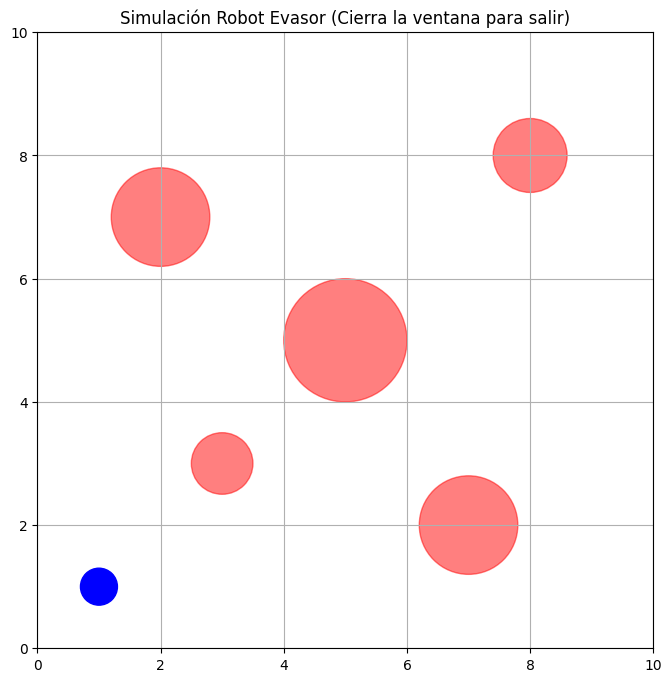

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# --- Configuración de la Ciudad Ficticia ---
CITY_SIZE = 100  # La ciudad es de 100x100 unidades (ej. km o cuadras)
NP_SEED = 42     # Semilla para reproducibilidad

# Cantidad de establecimientos a simular
NUM_DROGUERIAS = 12
NUM_SALUD = 5
NUM_COLEGIOS = 8

np.random.seed(NP_SEED)

def generate_locations(num_points, size):
    """Genera coordenadas (x, y) aleatorias dentro de la ciudad."""
    return np.random.uniform(0, size, (num_points, 2))

# Generar datos
droguerias = generate_locations(NUM_DROGUERIAS, CITY_SIZE)
centros_salud = generate_locations(NUM_SALUD, CITY_SIZE)
colegios = generate_locations(NUM_COLEGIOS, CITY_SIZE)

# --- Configuración de Visualización ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)
fig.suptitle(f'Diagramas de Voronoi: Cobertura de Servicios (Ciudad {CITY_SIZE}x{CITY_SIZE})', fontsize=16)

# Definimos una lista de configuraciones para iterar
services = [
    {
        "name": "Droguerías",
        "points": droguerias,
        "ax": axs[0],
        "color_point": 'red',
        "color_region": '#ffcccc' # Rojo claro
    },
    {
        "name": "Centros de Salud",
        "points": centros_salud,
        "ax": axs[1],
        "color_point": 'blue',
        "color_region": '#ccE5ff' # Azul claro
    },
    {
        "name": "Colegios",
        "points": colegios,
        "ax": axs[2],
        "color_point": 'green',
        "color_region": '#ccffcc' # Verde claro
    }
]

def plot_voronoi_clipped(vor, ax, bounds, region_color):
    """
    Dibuja el diagrama de Voronoi.
    Nota: Colorear regiones finitas es directo, pero las infinitas requieren
    lógica compleja de recorte. Aquí usamos una visualización estándar
    y ajustamos los límites del gráfico para simular el recorte.
    """
    # Usamos la función integrada de scipy para dibujar las líneas y puntos
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='gray',
                    line_width=2, line_alpha=0.6, point_size=10)

    # Colorear regiones (solo las finitas se colorean fácil automáticamente,
    # aquí hacemos un truco visual coloreando el fondo)
    ax.set_facecolor(region_color)

    # Ajustar límites para que parezca el plano de la ciudad
    ax.set_xlim(0, bounds)
    ax.set_ylim(0, bounds)
    ax.set_aspect('equal')

for service in services:
    ax = service["ax"]
    points = service["points"]
    name = service["name"]

    # Calcular Voronoi
    vor = Voronoi(points)

    # Dibujar
    plot_voronoi_clipped(vor, ax, CITY_SIZE, service["color_region"])

    # Estilizar puntos específicos
    ax.plot(points[:, 0], points[:, 1], 'o', color=service["color_point"],
            markeredgecolor='black', markersize=8, label=name)

    # Etiquetas y títulos
    ax.set_title(f"Cobertura de {name}", fontsize=12)
    ax.set_xlabel("Distancia X")
    ax.set_ylabel("Distancia Y")
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.show()